## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import math
%matplotlib inline
%alias_magic t timeit

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [3]:
x = np.linspace(0,20).reshape(50,1)
a = -2,
b = 1
y =( a*x+ b)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
def stop_criteria_gradient(grad,limits = .0001):
    return abs(np.sum(grad)) <= limits

In [ ]:
def predict_h(X_h , Theta_h):
    """
    this function takes the 
    features matrix (mxn) matrix
    and the 
    theata vector (nx1) vactor
    ----
    return the predicted values vector (mx1)
    """
    if (X_h.shape[1] == len(Theta_h)):
        return np.dot(X_h, Theta_h)
    else:
        X_h = np.hstack((np.ones((X_h.shape[0],1)),X_h))
        return np.dot(X_h, Theta_h)


In [165]:
def gradient_descent(features , target
                     , number_of_iterations=100
                     , learning_rate = 0.05
                     , batch_size = None
                     , momentum_gama = 0
                     , nag=False
                    ,gradlimit =.0001):
    thetas = []
    costs = []
    accrs = []
    grads = []
    features = np.hstack((np.ones((features.shape[0],1)),features))
    if batch_size == None:
        batch_size = features.shape[0]
        
    #split into batches
    No_of_batches = math.ceil(features.shape[0]/batch_size)
    full_features = np.array_split(features, No_of_batches)
    full_target = np.array_split(target, No_of_batches)

    #intialize the theta
    theta = np.zeros(features.shape[1]).reshape((features.shape[1],1))


    acc =0
    y_hat = full_features.copy()
    v = 0
    
    #stop to max iter
    iter_time = 0
    
    
    
#     while not (iter_time+1 > number_of_iterations):
    for r in range(number_of_iterations):
        
#     while not (iter_time+1 > number_of_iterations or acc > 99.999):
        for i in range(No_of_batches):
            
            #calc the M and start minizmize the cose
            m = full_target[i].shape[0]

            if nag == True:
                theta -= (momentum_gama* v)
                y_hat[i] = np.dot(full_features[i], theta)
                loss = y_hat[i] - full_target[i]
                theta -= (learning_rate *(1/m)* np.dot(full_features[i].T,(loss)))

            else:
                y_hat[i] = np.dot(full_features[i], theta)

                #get the cost to draw later
                loss = y_hat[i] - full_target[i]

            v = momentum_gama*v + (learning_rate*(1/m)*np.dot(full_features[i].T,(loss)))
            theta = theta-v
            thetas.append(theta)
            
#                 y_hat[i] = np.dot(full_features[i], theta)

            

            cost = 1/(2*m)*np.sum(loss**2)
            costs.append(cost)
            
            if (batch_size >=2):
                y_hat[i] = np.dot(full_features[i], theta)
#                 print(round(skm.r2_score(full_target[i],y_hat[i]),6))
                accrs.append(round(skm.r2_score(full_target[i],y_hat[i]),6))
                
    
                
        
        if (batch_size <2):
            y_hat = np.dot(features, theta)
            accrs.append(round(skm.r2_score(target,y_hat),6))
        iter_time += 1
        grad = (1/m)*np.dot(full_features[i].T,(loss))
        grads.append(grad)
        if stop_criteria_gradient(grad,gradlimit):
            break

    return theta,thetas,costs, accrs,iter_time,grads

In [166]:
theta_0001,list_of_thetas_0001,list_of_cost_0001, list_of_accuracy_0001,iter_times_0001,grads_0001= gradient_descent(x,y, number_of_iterations=1000
                     , learning_rate = 0.0001)
list_of_accuracy_0001[-1]

0.997698

In [167]:
list_of_thetas_0001

[array([[-0.0019    ],
        [-0.02593878]]),
 array([[-0.00377387],
        [-0.05152627]]),
 array([[-0.00562197],
        [-0.07676725]]),
 array([[-0.00744464],
        [-0.10166639]]),
 array([[-0.00924223],
        [-0.12622834]]),
 array([[-0.01101507],
        [-0.15045765]]),
 array([[-0.01276352],
        [-0.17435884]]),
 array([[-0.01448788],
        [-0.19793635]]),
 array([[-0.0161885 ],
        [-0.22119455]]),
 array([[-0.01786568],
        [-0.24413778]]),
 array([[-0.01951976],
        [-0.26677031]]),
 array([[-0.02115104],
        [-0.28909633]]),
 array([[-0.02275982],
        [-0.31112   ]]),
 array([[-0.02434643],
        [-0.33284542]]),
 array([[-0.02591115],
        [-0.35427663]]),
 array([[-0.02745428],
        [-0.3754176 ]]),
 array([[-0.02897612],
        [-0.39627228]]),
 array([[-0.03047695],
        [-0.41684453]]),
 array([[-0.03195705],
        [-0.43713819]]),
 array([[-0.03341672],
        [-0.45715703]]),
 array([[-0.03485622],
        [-0.47690

In [168]:
iter_times_0001

1000

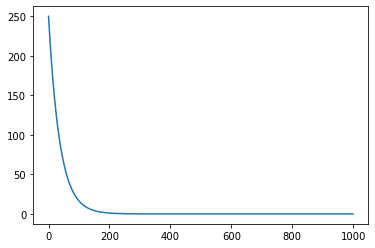

In [169]:
plt.plot(list_of_cost_0001);

#### Try your function with any input parameterss of your choice.

In [170]:
theta_0001_15,list_of_thetas_0001_15,list_of_cost_0001_15, list_of_accuracy_0001_15,iter_times_0001_15,grads_0001_15= gradient_descent(x,y, number_of_iterations=1000
                     , learning_rate = 0.0001,gradlimit=.15)

In [171]:
iter_times_0001_15

478

#### Plot loss vs. epochs

In [172]:
min(list_of_cost)

0.15970683156123983

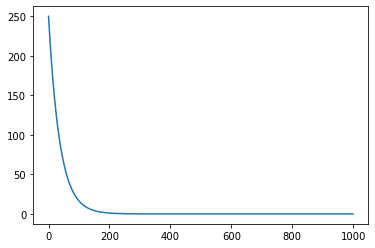

In [173]:
plt.plot(list_of_cost);

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

In [174]:
theta_0 = np.array(list_of_thetas_0001_15).reshape(478,2)[:,[0]]

In [175]:
theta_1 = np.array(list_of_thetas_0001_15).reshape(478,2)[:,[1]]

In [176]:
theta_0.shape

(478, 1)

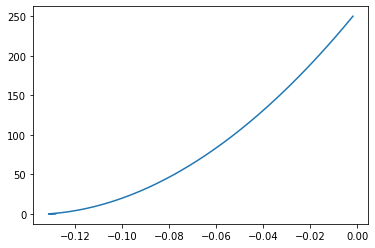

In [182]:
plt.plot(theta_0,list_of_cost_0001_15_arr);

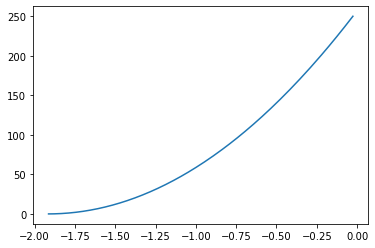

In [184]:
plt.plot(theta_1,list_of_cost_0001_15_arr);

#### Plot all regression lines till converge

In [193]:
def predict_h(X_h , Theta_h):
    """
    this function takes the 
    features matrix (mxn) matrix
    and the 
    theata vector (nx1) vactor
    ----
    return the predicted values vector (mx1)
    """
    if (X_h.shape[1] == len(Theta_h)):
        return np.dot(X_h, Theta_h)
    else:
        X_h = np.hstack((np.ones((X_h.shape[0],1)),X_h))
        return np.dot(X_h, Theta_h)

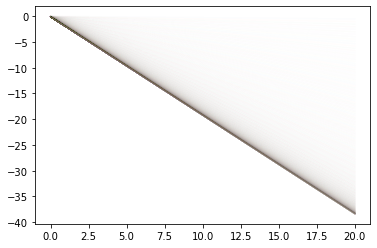

In [196]:
for i in (list_of_thetas_0001_15):
    plt.plot(x , predict_h(x , i) , alpha=0.01)


#### Plot the best regression line

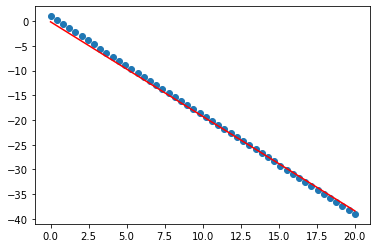

In [200]:
plt.scatter(x,y)
plt.plot(x , predict_h(x , theta_0001_15) , c ='red');

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

number_of_iterations = 1000 learning_rate =0.0001 


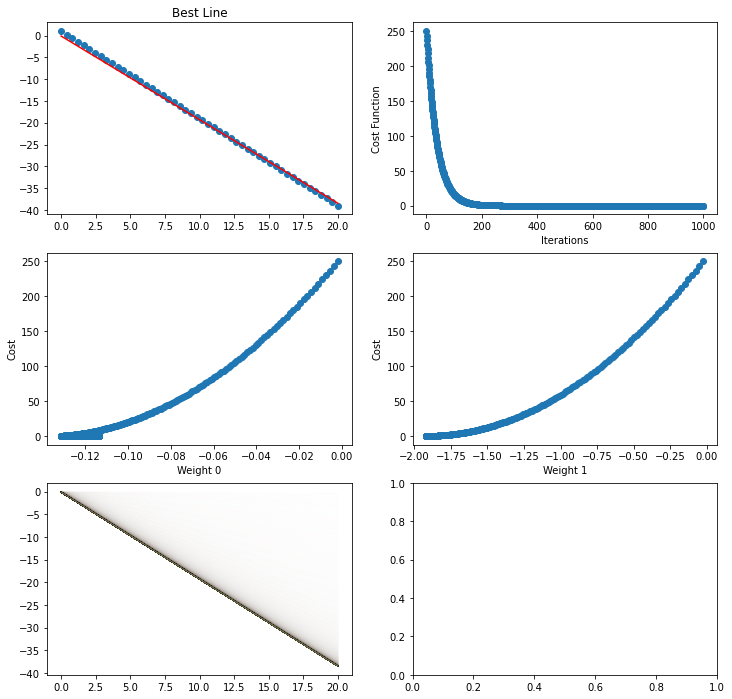

In [208]:
number_of_iterations = 1000
learning_rate = 0.0001
theta,list_of_thetas,list_of_cost, list_of_accuracy,iter_times,grads= gradient_descent(x,y, number_of_iterations=number_of_iterations
                     , learning_rate =learning_rate)
_, axs = plt.subplots(3,2, figsize=(12, 12))
print(f"number_of_iterations = {number_of_iterations} learning_rate ={learning_rate} ")
theta_0 = np.array(list_of_thetas).reshape(len(list_of_thetas),2)[:,[0]]
theta_1 = np.array(list_of_thetas).reshape(len(list_of_thetas),2)[:,[1]]

axs[0,0].title.set_text("Best Line")
axs[0,0].plot(x , predict_h(x , theta) , c='r')
axs[0,0].scatter(x , y)

axs[0,1].set_xlabel("Iterations")
axs[0,1].set_ylabel("Cost Function")
axs[0,1].plot(list_of_cost ,  marker="o")

axs[1,0].set_xlabel("Weight 0")
axs[1,0].set_ylabel("Cost")
axs[1,0].plot(theta_0,list_of_cost , marker="o")


axs[1,1].set_xlabel("Weight 1")
axs[1,1].set_ylabel("Cost")
axs[1,1].plot(theta_1,list_of_cost , marker="o")

for i in (list_of_thetas):
    axs[2,0].plot(x , predict_h(x , i) , alpha=0.01)

number_of_iterations = 100 learning_rate =0.01 


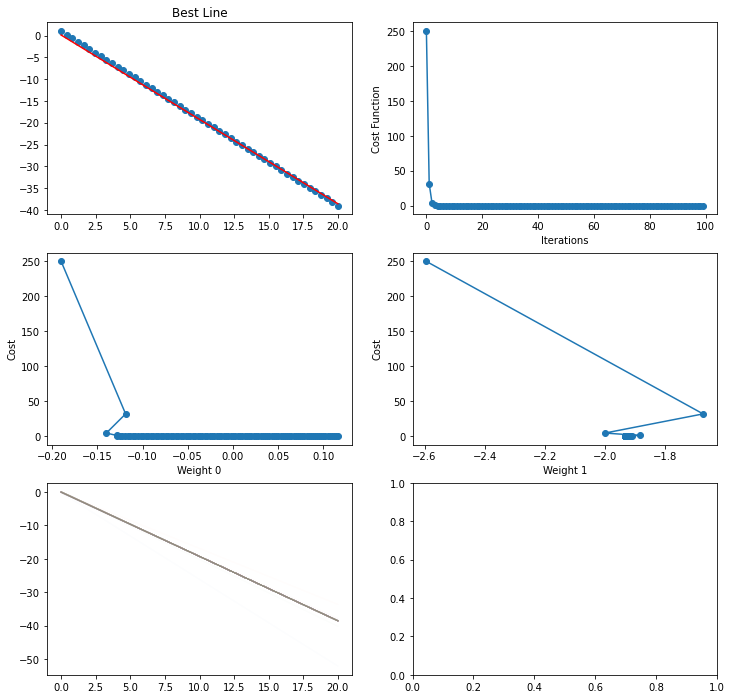

In [209]:
number_of_iterations = 100
learning_rate = 0.01
theta,list_of_thetas,list_of_cost, list_of_accuracy,iter_times,grads= gradient_descent(x,y, number_of_iterations=number_of_iterations
                     , learning_rate =learning_rate)
_, axs = plt.subplots(3,2, figsize=(12, 12))
print(f"number_of_iterations = {number_of_iterations} learning_rate ={learning_rate} ")
theta_0 = np.array(list_of_thetas).reshape(len(list_of_thetas),2)[:,[0]]
theta_1 = np.array(list_of_thetas).reshape(len(list_of_thetas),2)[:,[1]]

axs[0,0].title.set_text("Best Line")
axs[0,0].plot(x , predict_h(x , theta) , c='r')
axs[0,0].scatter(x , y)

axs[0,1].set_xlabel("Iterations")
axs[0,1].set_ylabel("Cost Function")
axs[0,1].plot(list_of_cost ,  marker="o")

axs[1,0].set_xlabel("Weight 0")
axs[1,0].set_ylabel("Cost")
axs[1,0].plot(theta_0,list_of_cost , marker="o")


axs[1,1].set_xlabel("Weight 1")
axs[1,1].set_ylabel("Cost")
axs[1,1].plot(theta_1,list_of_cost , marker="o")

for i in (list_of_thetas):
    axs[2,0].plot(x , predict_h(x , i) , alpha=0.01)

number_of_iterations = 100 learning_rate =0.05 


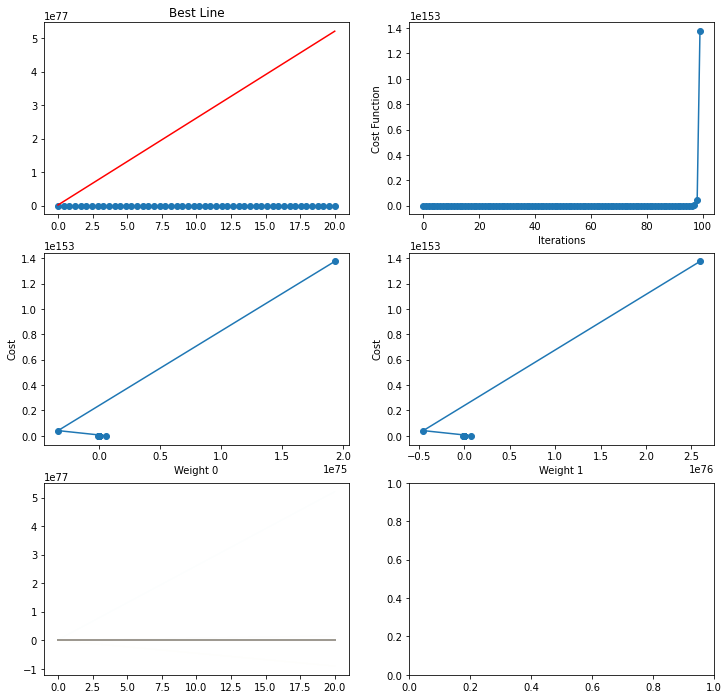

In [210]:
number_of_iterations = 100
learning_rate = 0.05
theta,list_of_thetas,list_of_cost, list_of_accuracy,iter_times,grads= gradient_descent(x,y, number_of_iterations=number_of_iterations
                     , learning_rate =learning_rate)
_, axs = plt.subplots(3,2, figsize=(12, 12))
print(f"number_of_iterations = {number_of_iterations} learning_rate ={learning_rate} ")
theta_0 = np.array(list_of_thetas).reshape(len(list_of_thetas),2)[:,[0]]
theta_1 = np.array(list_of_thetas).reshape(len(list_of_thetas),2)[:,[1]]

axs[0,0].title.set_text("Best Line")
axs[0,0].plot(x , predict_h(x , theta) , c='r')
axs[0,0].scatter(x , y)

axs[0,1].set_xlabel("Iterations")
axs[0,1].set_ylabel("Cost Function")
axs[0,1].plot(list_of_cost ,  marker="o")

axs[1,0].set_xlabel("Weight 0")
axs[1,0].set_ylabel("Cost")
axs[1,0].plot(theta_0,list_of_cost , marker="o")


axs[1,1].set_xlabel("Weight 1")
axs[1,1].set_ylabel("Cost")
axs[1,1].plot(theta_1,list_of_cost , marker="o")

for i in (list_of_thetas):
    axs[2,0].plot(x , predict_h(x , i) , alpha=0.01)

number_of_iterations = 10000 learning_rate =0.001 


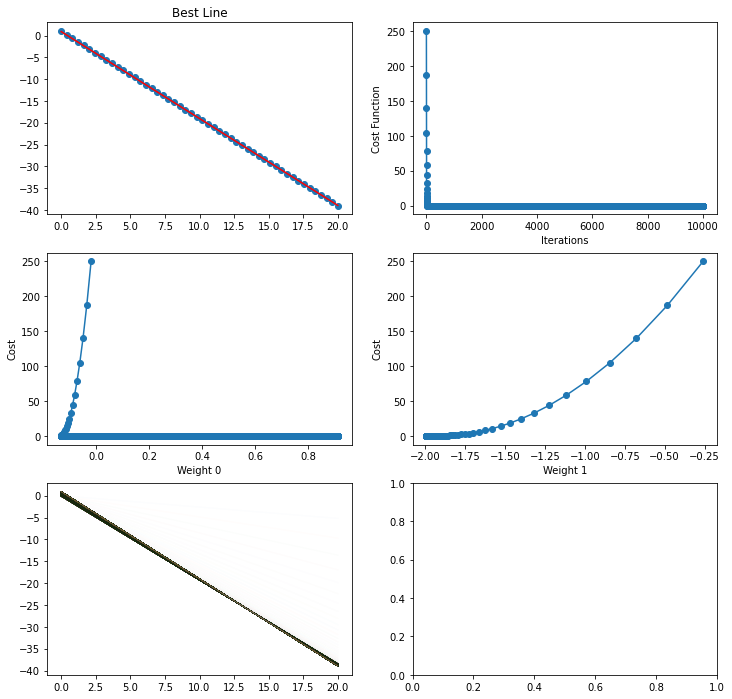

In [211]:
number_of_iterations = 10000
learning_rate = 0.001
theta,list_of_thetas,list_of_cost, list_of_accuracy,iter_times,grads= gradient_descent(x,y, number_of_iterations=number_of_iterations
                     , learning_rate =learning_rate)
_, axs = plt.subplots(3,2, figsize=(12, 12))
print(f"number_of_iterations = {number_of_iterations} learning_rate ={learning_rate} ")
theta_0 = np.array(list_of_thetas).reshape(len(list_of_thetas),2)[:,[0]]
theta_1 = np.array(list_of_thetas).reshape(len(list_of_thetas),2)[:,[1]]

axs[0,0].title.set_text("Best Line")
axs[0,0].plot(x , predict_h(x , theta) , c='r')
axs[0,0].scatter(x , y)

axs[0,1].set_xlabel("Iterations")
axs[0,1].set_ylabel("Cost Function")
axs[0,1].plot(list_of_cost ,  marker="o")

axs[1,0].set_xlabel("Weight 0")
axs[1,0].set_ylabel("Cost")
axs[1,0].plot(theta_0,list_of_cost , marker="o")


axs[1,1].set_xlabel("Weight 1")
axs[1,1].set_ylabel("Cost")
axs[1,1].plot(theta_1,list_of_cost , marker="o")

for i in (list_of_thetas):
    axs[2,0].plot(x , predict_h(x , i) , alpha=0.01)

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [213]:
theta_MB,list_of_thetas_MB,list_of_cost_MB, list_of_accuracy_MB,iter_times_MB,grads_MB= gradient_descent(x,y, number_of_iterations=1000
                     , learning_rate =.0001
                                                                                                         ,batch_size=20)
1

number_of_iterations = 1000 learning_rate =0.0001 


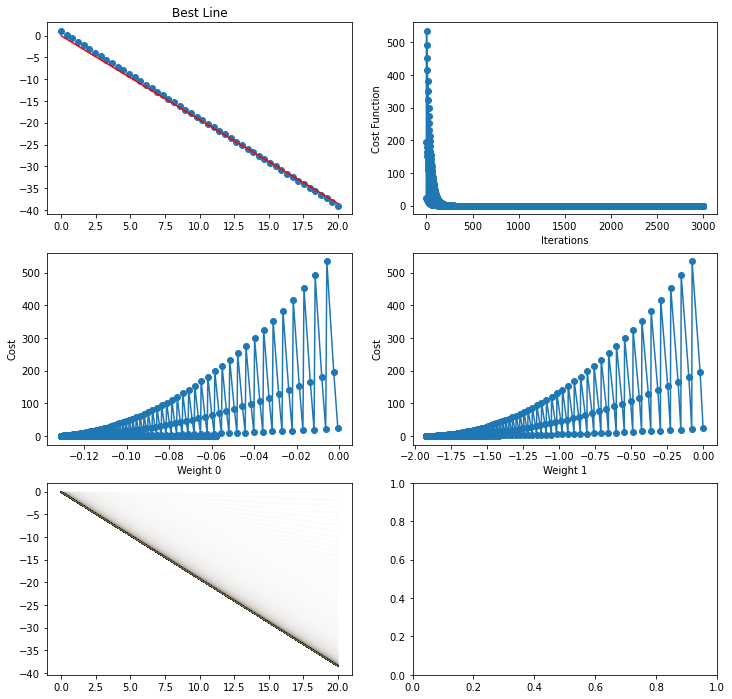

In [216]:
_, axs = plt.subplots(3,2, figsize=(12, 12))
print(f"number_of_iterations = {1000} learning_rate ={.0001} ")
theta_0 = np.array(list_of_thetas_MB).reshape(len(list_of_thetas_MB),2)[:,[0]]
theta_1 = np.array(list_of_thetas_MB).reshape(len(list_of_thetas_MB),2)[:,[1]]

axs[0,0].title.set_text("Best Line")
axs[0,0].plot(x , predict_h(x , theta_MB) , c='r')
axs[0,0].scatter(x , y)

axs[0,1].set_xlabel("Iterations")
axs[0,1].set_ylabel("Cost Function")
axs[0,1].plot(list_of_cost_MB ,  marker="o")

axs[1,0].set_xlabel("Weight 0")
axs[1,0].set_ylabel("Cost")
axs[1,0].plot(theta_0,list_of_cost_MB , marker="o")


axs[1,1].set_xlabel("Weight 1")
axs[1,1].set_ylabel("Cost")
axs[1,1].plot(theta_1,list_of_cost_MB , marker="o")

for i in (list_of_thetas_MB):
    axs[2,0].plot(x , predict_h(x , i) , alpha=0.01)

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [220]:
theta_Stoc,list_of_thetas_Stoc,list_of_cost_Stoc, list_of_accuracy_Stoc,iter_times_Stoc,grads_Stoc= gradient_descent(x,y, number_of_iterations=1000
                     , learning_rate =.0001
                                                                                                         ,batch_size=1)
1

1

nuStocer_of_iterations = 1000 learning_rate =0.0001 


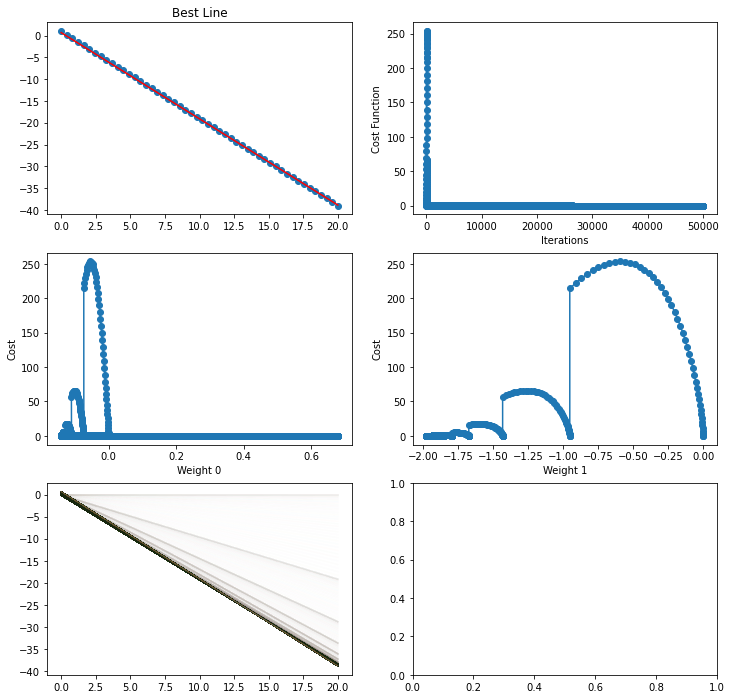

In [221]:
_, axs = plt.subplots(3,2, figsize=(12, 12))
print(f"nuStocer_of_iterations = {1000} learning_rate ={.0001} ")
theta_0 = np.array(list_of_thetas_Stoc).reshape(len(list_of_thetas_Stoc),2)[:,[0]]
theta_1 = np.array(list_of_thetas_Stoc).reshape(len(list_of_thetas_Stoc),2)[:,[1]]

axs[0,0].title.set_text("Best Line")
axs[0,0].plot(x , predict_h(x , theta_Stoc) , c='r')
axs[0,0].scatter(x , y)

axs[0,1].set_xlabel("Iterations")
axs[0,1].set_ylabel("Cost Function")
axs[0,1].plot(list_of_cost_Stoc ,  marker="o")

axs[1,0].set_xlabel("Weight 0")
axs[1,0].set_ylabel("Cost")
axs[1,0].plot(theta_0,list_of_cost_Stoc , marker="o")


axs[1,1].set_xlabel("Weight 1")
axs[1,1].set_ylabel("Cost")
axs[1,1].plot(theta_1,list_of_cost_Stoc , marker="o")

for i in (list_of_thetas_Stoc):
    axs[2,0].plot(x , predict_h(x , i) , alpha=0.01)

## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [225]:
theta_mag_9,list_of_thetas_mag_9,list_of_cost_mag_9, list_of_accuracy_mag_9,iter_times_mag_9,grads_mag_9= gradient_descent(x,y
                      , number_of_iterations=1000
                     , learning_rate =.0001
                      , momentum_gama = .9
                     , nag=False)

number_of_iterations = 1000 learning_rate =0.0001 


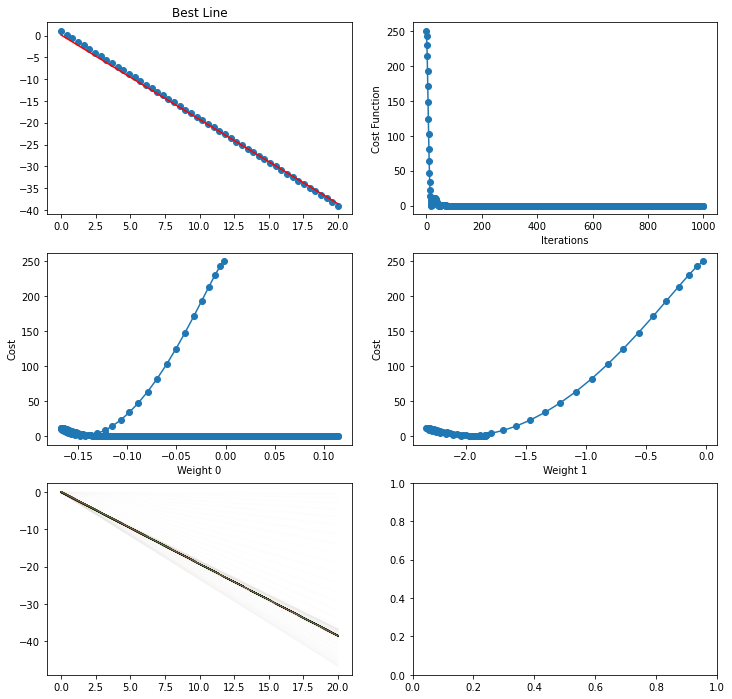

In [226]:
_, axs = plt.subplots(3,2, figsize=(12, 12))
print(f"number_of_iterations = {1000} learning_rate ={.0001} ")
theta_0 = np.array(list_of_thetas_mag_9).reshape(len(list_of_thetas_mag_9),2)[:,[0]]
theta_1 = np.array(list_of_thetas_mag_9).reshape(len(list_of_thetas_mag_9),2)[:,[1]]

axs[0,0].title.set_text("Best Line")
axs[0,0].plot(x , predict_h(x , theta_mag_9) , c='r')
axs[0,0].scatter(x , y)

axs[0,1].set_xlabel("Iterations")
axs[0,1].set_ylabel("Cost Function")
axs[0,1].plot(list_of_cost_mag_9 ,  marker="o")

axs[1,0].set_xlabel("Weight 0")
axs[1,0].set_ylabel("Cost")
axs[1,0].plot(theta_0,list_of_cost_mag_9 , marker="o")


axs[1,1].set_xlabel("Weight 1")
axs[1,1].set_ylabel("Cost")
axs[1,1].plot(theta_1,list_of_cost_mag_9 , marker="o")

for i in (list_of_thetas_mag_9):
    axs[2,0].plot(x , predict_h(x , i) , alpha=0.01)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [227]:
theta_mag_9,list_of_thetas_mag_9,list_of_cost_mag_9, list_of_accuracy_mag_9,iter_times_mag_9,grads_mag_9= gradient_descent(x,y
                      , number_of_iterations=1000
                     , learning_rate =.0001
                      , momentum_gama = 0
                     , nag=False)

number_of_iterations = 1000 learning_rate =0.0001 


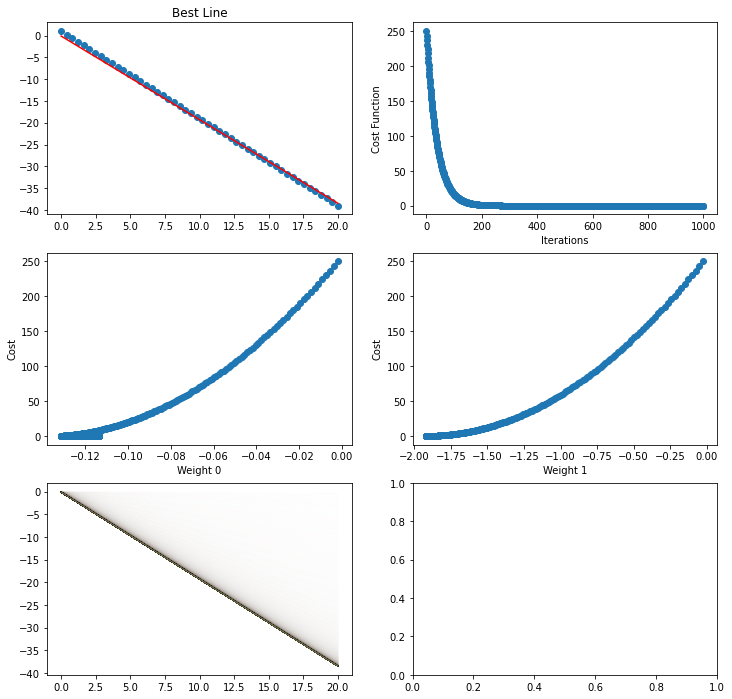

In [228]:
_, axs = plt.subplots(3,2, figsize=(12, 12))
print(f"number_of_iterations = {1000} learning_rate ={.0001} ")
theta_0 = np.array(list_of_thetas_mag_9).reshape(len(list_of_thetas_mag_9),2)[:,[0]]
theta_1 = np.array(list_of_thetas_mag_9).reshape(len(list_of_thetas_mag_9),2)[:,[1]]

axs[0,0].title.set_text("Best Line")
axs[0,0].plot(x , predict_h(x , theta_mag_9) , c='r')
axs[0,0].scatter(x , y)

axs[0,1].set_xlabel("Iterations")
axs[0,1].set_ylabel("Cost Function")
axs[0,1].plot(list_of_cost_mag_9 ,  marker="o")

axs[1,0].set_xlabel("Weight 0")
axs[1,0].set_ylabel("Cost")
axs[1,0].plot(theta_0,list_of_cost_mag_9 , marker="o")


axs[1,1].set_xlabel("Weight 1")
axs[1,1].set_ylabel("Cost")
axs[1,1].plot(theta_1,list_of_cost_mag_9 , marker="o")

for i in (list_of_thetas_mag_9):
    axs[2,0].plot(x , predict_h(x , i) , alpha=0.01)

### Update your Batch GD for one variable  implementation to be NAG and check your results

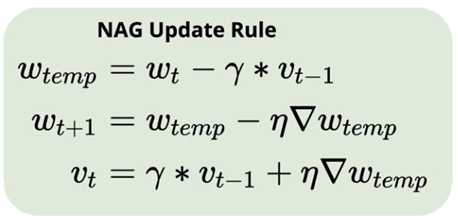

In [229]:
theta_magnag,list_of_thetas_magnag,list_of_cost_magnag, list_of_accuracy_magnag,iter_times_magnag,grads_magnag= gradient_descent(x,y
                      , number_of_iterations=1000
                     , learning_rate =.0001
                      , momentum_gama = .9
                     , nag=False)

number_of_iterations = 1000 learning_rate =0.0001 


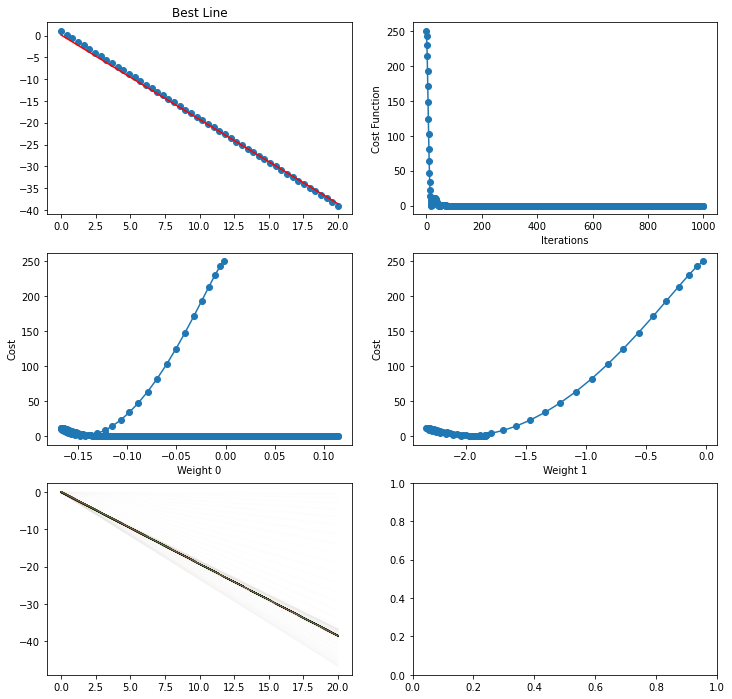

In [230]:
_, axs = plt.subplots(3,2, figsize=(12, 12))
print(f"number_of_iterations = {1000} learning_rate ={.0001} ")
theta_0 = np.array(list_of_thetas_magnag).reshape(len(list_of_thetas_magnag),2)[:,[0]]
theta_1 = np.array(list_of_thetas_magnag).reshape(len(list_of_thetas_magnag),2)[:,[1]]

axs[0,0].title.set_text("Best Line")
axs[0,0].plot(x , predict_h(x , theta_magnag) , c='r')
axs[0,0].scatter(x , y)

axs[0,1].set_xlabel("Iterations")
axs[0,1].set_ylabel("Cost Function")
axs[0,1].plot(list_of_cost_magnag ,  marker="o")

axs[1,0].set_xlabel("Weight 0")
axs[1,0].set_ylabel("Cost")
axs[1,0].plot(theta_0,list_of_cost_magnag , marker="o")


axs[1,1].set_xlabel("Weight 1")
axs[1,1].set_ylabel("Cost")
axs[1,1].plot(theta_1,list_of_cost_magnag , marker="o")

for i in (list_of_thetas_magnag):
    axs[2,0].plot(x , predict_h(x , i) , alpha=0.01)

## Congratulations 
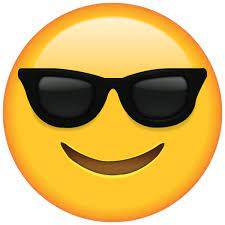